## Fourier series

Here, we consider two examples of _**Fourier series**_ expansion of two functions:

- _continuous hat function_


$$
f(x) = \left\{
\begin{array}{rl}
    0, & x\in \left[-\pi, -\frac{\pi}{2}\right) \\
    1 + \frac{2}{\pi}x, & x\in\left[-\frac{\pi}{2}, 0\right) \\
    1 - \frac{2}{\pi}x, & x\in\left[0, \frac{\pi}{2}\right) \\
    0, & x\in \left[\frac{\pi}{2}, \pi\right]
\end{array}.
\right.
$$

- _discontinuous hat function_

$$
f(x) = \left\{
\begin{array}{rl}
    0, & x\in \left[0, \frac{L}{4}\right) \\
    1, & x\in\left[\frac{L}{4}, \frac{3L}{4}\right) \\
    0, & x\in \left[\frac{3L}{4}, L\right]
\end{array}.
\right.
$$

Let's start with importing necessary python modules.

In [104]:
import numpy as np
import matplotlib.pyplot as plt

Let's create a Pyhton function, representing hat functions.

In [105]:
def continuous_hat(x, L = np.pi):
    if (x < -0.5 * L):
        return 0
    elif (-0.5 * L <= x) & (x < 0):
        return 1 + 2 * x / L
    elif (0 <= x) & (x < 0.5 * L):
        return 1 - 2 * x / L
    else:
        return 0

In [106]:
def discontinuous_hat(x, L = np.pi):
    if (x < 0.25 * L):
        return 0
    elif (0.25 * L <= x) & (x < 0.75 * L):
        return 1
    else:
        return 0        

Let's visualize a _continuous hat_ function.

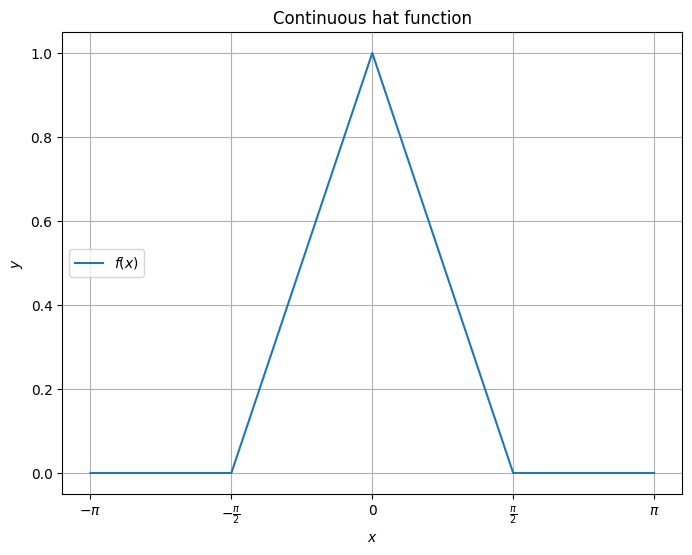

In [107]:
L = np.pi
n = 50

# pieces 1, 2, 3, 4
x1 = np.linspace(-1.0, -0.5, n) * L
x2 = np.linspace(-0.5,  0.0, n) * L
x3 = np.linspace( 0.0,  0.5, n) * L
x4 = np.linspace( 0.5,  1.0, n) * L

x = np.hstack([x1[:-1], x2[:-1], x3[:-1], x4])
y = [continuous_hat(x[i]) for i in np.arange(len(x))]

# plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label = r"$f(x)$")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xticks(np.array([-L, -0.5*L, 0, 0.5*L, L]), [r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.title("Continuous hat function")
plt.legend(loc="center left")
plt.savefig("figures/lecture02-ex01a.png", dpi = 300)

Now, let's find a Fourier series representation for this function:

$$
f(x) = \frac{a_0}{2} + \sum_{k=1}^{+\infty}\left(a_k\cos(kx) + b_k\sin(kx)\right).
$$

For a prictical purpose, we have a finite number of terms in the series, i.e., 

$$
f(x) \approx \frac{a_0}{2} + \sum_{k=1}^{N}\left(a_k\cos(kx) + b_k\sin(kx)\right).
$$

Coefficients of the series are calculated as

$$
\begin{aligned}
a_0 &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)dx \\
a_k &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos(kx)dx, \: k = 1, \ldots, N \\
b_k &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin(kx)dx, \: k = 1, \ldots, N
\end{aligned}.
$$

To calculate coefficients, we are going to use numeric integration. For a given function $g(x), \: x \in [x_1, x_2]$,

$$
\int_{x_1}^{x_2}g(x)dx \approx h\sum_{i=1}^nf(x_0^{(i)}),
$$

where 

- $n$ is a number of subintervals over the interval $[x_1, x_2]$.
- $h$ is an integration step: $h = \frac{x_2-x_1}{n}$.
- $x_0^{(i)}$ are midpoints of the subintervals: $x_0^{(i)} = x_1 + h\frac{2i-1}{2}, \: i = 1, \ldots, n$.

This is a _midpoint_ integration rule.

In [108]:
# a function to perform an inetration
def midpoint(g, x1, x2, n, tol = 1e-10):
    result1 = np.inf

    # integration step
    h = (x2 - x1)/n
    
    # midpoints of subintervals
    x0 = np.array([x1 + 0.5 * (2*i+1) * h for i in np.arange(n)])

    # evaluating function g(x) at midpoints
    g0 = np.array([g(m) for m in x0])

    # integration
    result2 = h*sum(g0)

    while np.abs(result1 - result2) > tol:
        result1 = result2

        # double reduce an integration step
        h = (x2 - x1)/(2 * n)
    
        # midpoints of new subintervals
        x0 = np.array([x1 + 0.5 * (2*i+1) * h for i in np.arange(2*n)])

        # evaluating function g(x) at midpoints
        g0 = np.array([g(m) for m in x0])

        # integration
        result2 = h*sum(g0)

    return result2

Now, let's calculate Fourier coefficients and Fourier series approximation.

In [109]:
fourier = []
n = 100

a0 = sum(np.array([midpoint(continuous_hat, x[0], x[-1], n) for x in [x1, x2, x3, x4]]))/np.pi
for N in [5, 20]:
    a = np.zeros(N)
    b = np.zeros(N)
    for k in np.arange(N):
        a[k] = sum(np.array([midpoint(lambda x: continuous_hat(x)*np.cos((k+1)*x), x[0], x[-1], n) for x in [x1, x2, x3, x4]]))/np.pi
        b[k] = sum(np.array([midpoint(lambda x: continuous_hat(x)*np.sin((k+1)*x), x[0], x[-1], n) for x in [x1, x2, x3, x4]]))/np.pi


    S = a0/2 * np.ones_like(x)
    for k in np.arange(N):
        S += a[k]*np.cos((k+1)*x) + b[k]*np.sin((k+1)*x)

    fourier.append(S)    

Visualizing the results.

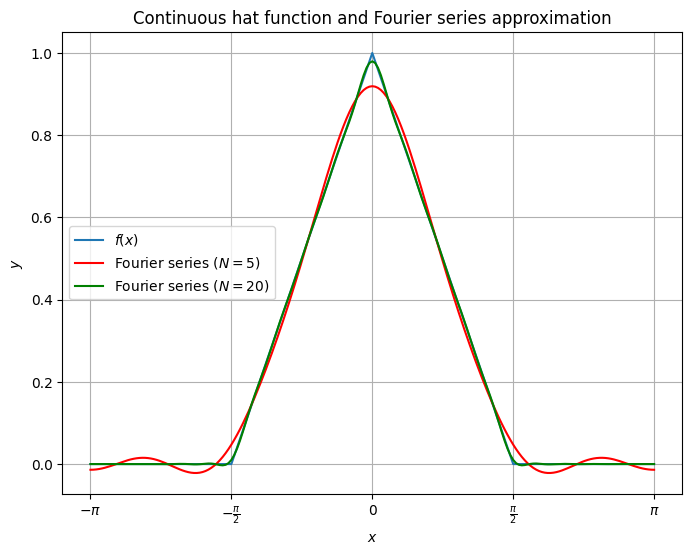

In [110]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label = r"$f(x)$")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xticks(np.array([-L, -0.5*L, 0, 0.5*L, L]), [r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$"])
plt.title("Continuous hat function and Fourier series approximation")
plt.plot(x, fourier[0], color = "red", label = r"Fourier series ($N=5$)")
plt.plot(x, fourier[1], color = "green", label = r"Fourier series ($N=20$)")
plt.legend(loc="center left")
plt.savefig("figures/lecture02-ex01b.png", dpi = 300)

Now, let's repeat the above steps for the discontinuous hat function.

First, let's visualize it:

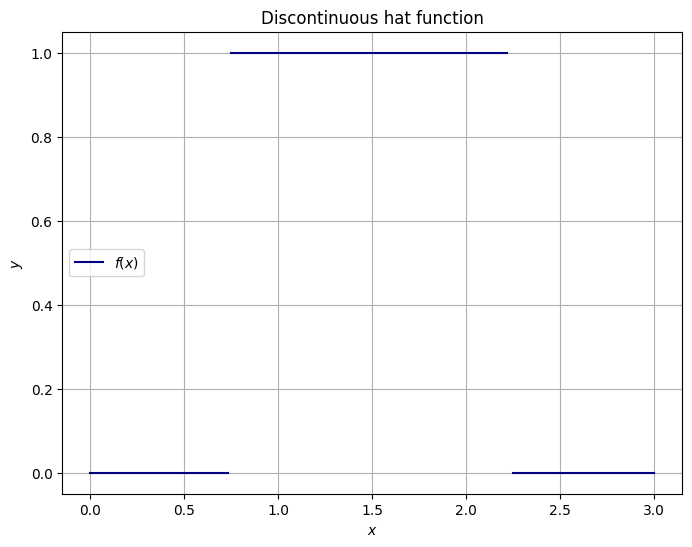

In [111]:
L = 3
n = 50

# pieces 1, 2, 3
x1 = np.linspace(0.00, 0.25, n) * L
y1 = [discontinuous_hat(x, L) for x in x1[:-1]]

x2 = np.linspace(0.25, 0.75, n) * L
y2 = [discontinuous_hat(x, L) for x in x2[:-1]]

x3 = np.linspace(0.75, 1.00, n) * L
y3 = [discontinuous_hat(x, L) for x in x3]

# plotting
plt.figure(figsize = (8, 6))
plt.plot(x1[:-1], y1, color = "navy")
plt.plot(x2[:-1], y2, color = "navy")
plt.plot(x3, y3, color = "navy", label = r"$f(x)$")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Discontinuous hat function")
plt.legend(loc="center left")
plt.savefig("figures/lecture02-ex02a.png", dpi = 300)

Let's find a Fourier series expansion for that function.

In [112]:
fourier = []
n = 100
x = np.hstack([x1[:-1], x2[:-1], x3])

a0 = (2/L)*sum(np.array([midpoint(lambda x: discontinuous_hat(x, L), x[0], x[-1], n) for x in [x1, x2, x3]]))
for N in [5, 20]:
    a = np.zeros(N)
    b = np.zeros(N)
    for k in np.arange(N):
        a[k] = (2/L)*sum(np.array([midpoint(lambda x: discontinuous_hat(x, L)*np.cos(2*np.pi*(k+1)*x/L), x[0], x[-1], n) for x in [x1, x2, x3]]))
        b[k] = (2/L)*sum(np.array([midpoint(lambda x: discontinuous_hat(x, L)*np.sin(2*np.pi*(k+1)*x/L), x[0], x[-1], n) for x in [x1, x2, x3]]))


    S = a0/2 * np.ones_like(x)
    for k in np.arange(N):
        S += a[k]*np.cos(2*np.pi*(k+1)*x/L) + b[k]*np.sin(2*np.pi*(k+1)*x/L)

    fourier.append(S)    

Visualizing the results.

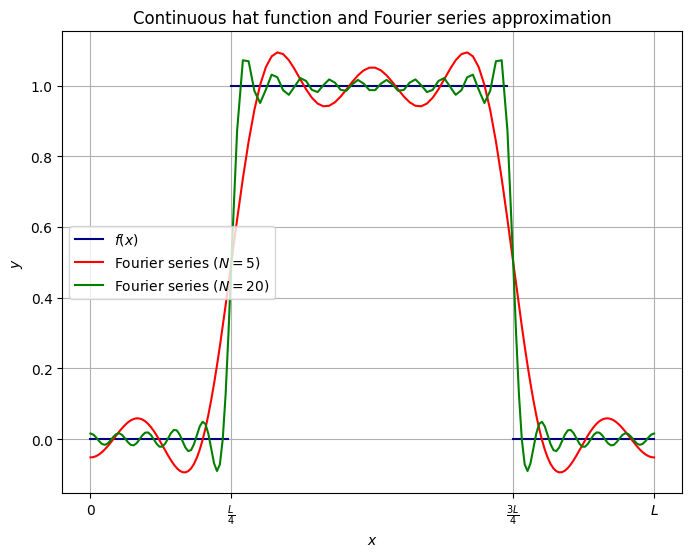

In [113]:
plt.figure(figsize = (8, 6))
plt.plot(x1[:-1], y1, color = "navy")
plt.plot(x2[:-1], y2, color = "navy")
plt.plot(x3, y3, color = "navy", label = r"$f(x)$")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xticks(np.array([0, 0.25*L, 0.75*L, L]), [r"$0$", r"$\frac{L}{4}$", r"$\frac{3L}{4}$", r"$L$"])
plt.title("Continuous hat function and Fourier series approximation")
plt.plot(x, fourier[0], color = "red", label = r"Fourier series ($N=5$)")
plt.plot(x, fourier[1], color = "green", label = r"Fourier series ($N=20$)")
plt.legend(loc="center left")
plt.savefig("figures/lecture02-ex01b.png", dpi = 300)